In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"

In [3]:
lefthanded_data = pd.read_csv(data_url_1)

In [4]:
%matplotlib inline

Text(0, 0.5, 'Age')

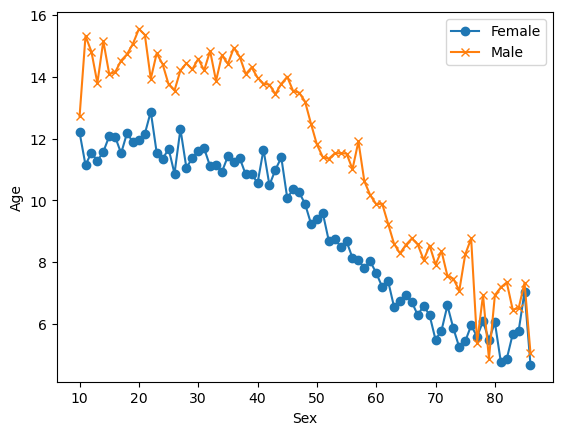

In [5]:
fig, ax = plt.subplots()
ax.plot('Age','Female', data = lefthanded_data, marker = 'o')
ax.plot('Age','Male',  data = lefthanded_data, marker = 'x')
ax.legend()
ax.set_xlabel('Sex')
ax.set_ylabel('Age')

In [6]:
# create a new column for birth year of each age


In [7]:
lefthanded_data['Birth_year'] = 1986 - lefthanded_data['Age']

In [8]:
lefthanded_data['Mean_lh'] = lefthanded_data[['Male','Female']].mean(axis=1)

Text(0, 0.5, 'Mean_lh')

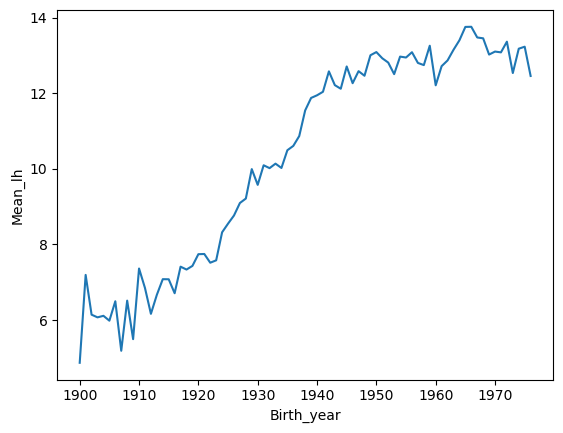

In [9]:
fig,ax=plt.subplots()
ax.plot('Birth_year','Mean_lh',data=lefthanded_data)
ax.set_xlabel('Birth_year')
ax.set_ylabel('Mean_lh')

In [10]:
# import library

In [11]:
import numpy as np

In [12]:
def P_lh_given_A(ages_of_death, study_year = 1990):
     early_1900s_rate = lefthanded_data['Mean_lh'][-10:].mean()
     late_1900s_rate = lefthanded_data['Mean_lh'][:10].mean()
     middle_rates = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year - ages_of_death)]['Mean_lh']
     youngest_age = study_year - 1986 + 10 
     oldest_age = study_year - 1986 + 86
     P_return = np.zeros(ages_of_death.shape)
    
     P_return[ages_of_death>oldest_age]=early_1900s_rate/100
     P_return[ages_of_death<youngest_age]=late_1900s_rate/100
     P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100
     return P_return

In [13]:
data_url_2="https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

In [14]:
death_distribution_data= pd.read_csv(data_url_2,sep='\t',skiprows=[1])

In [15]:
death_distribution_data=death_distribution_data.dropna(subset =['Both Sexes'])

In [16]:
# plot number of people who died as a function of age

Text(0, 0.5, 'Both Sexes')

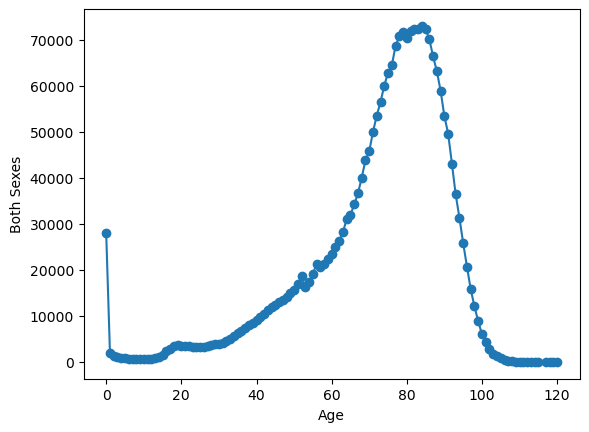

In [17]:
fig, ax=plt.subplots()
ax.plot('Age','Both Sexes', data=death_distribution_data, marker='o')
ax.set_xlabel('Age') 
ax.set_ylabel('Both Sexes')

In [18]:
def P_lh(death_distribution_data, study_year = 1990): 
    """ Overall probability of being left-handed if you died in the study year
    Input: dataframe of death distribution data, study year
    Output: P(LH), a single floating point number """
    p_list = death_distribution_data['Both Sexes']*P_lh_given_A(death_distribution_data['Age'],study_year)
    p = np.sum(p_list)
    return p/ np.sum(death_distribution_data['Both Sexes'])

print(P_lh(death_distribution_data))

0.07766387615350638


In [19]:
# The overall probability of being a particular `age_of_death` given that you're left-handed ""

In [20]:
def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    
    P_A = death_distribution_data['Both Sexes'][ages_of_death]/np.sum(death_distribution_data['Both Sexes'])
    P_left = P_lh(death_distribution_data, study_year)
    P_lh_A = P_lh_given_A(ages_of_death,study_year)
    return P_lh_A*P_A/P_left

In [21]:
def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    
    P_A = death_distribution_data['Both Sexes'][ages_of_death]/np.sum(death_distribution_data['Both Sexes'])
    P_right = 1-P_lh(death_distribution_data,study_year)
    P_rh_A =  1-P_lh_given_A(ages_of_death,study_year)
    return P_rh_A*P_A/P_right



In [22]:
# calculate the probability of being left- or right-handed for each
ages = np.arange(6, 115 , 1)

In [23]:
left_handed_probability = P_A_given_lh(ages,death_distribution_data)
right_handed_probability= P_A_given_rh(ages,death_distribution_data)

Text(0, 0.5, 'Probability of being age A at death')

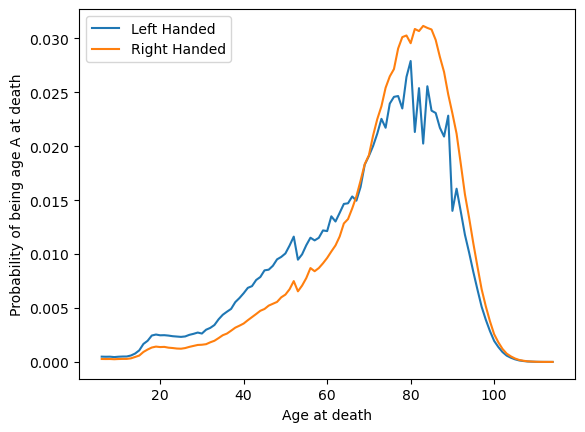

In [24]:
fig,ax=plt.subplots()
ax.plot(ages,left_handed_probability,label="Left Handed")
ax.plot(ages,right_handed_probability,label="Right Handed")
ax.legend()
ax.set_xlabel("Age at death")
ax.set_ylabel(r"Probability of being age A at death")

In [25]:
# calculate average ages for left-handed and right-handed groups

In [26]:
average_lh_age= np.nansum(ages*np.array(left_handed_probability))
average_rh_age= np.nansum(ages*np.array(right_handed_probability))


In [27]:
# print the average ages for each group

In [28]:
print("Average age of lefthanded"+str(average_lh_age))
print("Average age of righthanded"+str(average_rh_age))

Average age of lefthanded67.24503662801027
Average age of righthanded72.79171936526477


In [29]:
# print the difference between the average ages

In [30]:
print("The difference in average age is"+str(round(average_rh_age - average_lh_age, 1))+"years")

The difference in average age is5.5years


In [31]:
# Calculate the probability of being left- or right-handed for all ages

In [32]:
left_handed_probability_2018=P_A_given_lh(ages,death_distribution_data,2018)
right_handed_probability_2018=P_A_given_rh(ages,death_distribution_data,2018)

In [33]:
average_lh_age_2018 = np.nansum(ages*np.array(left_handed_probability_2018))
average_rh_age_2018 = np.nansum(ages*np.array(right_handed_probability_2018))

In [34]:
print("The difference in average ages is "+str(round(average_rh_age_2018 - average_lh_age_2018,1))+"years")

The difference in average ages is 2.3years
